In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#캐글에서 온 train.csv만 있는 파일   ## path 바꿔서 읽어야 합니다
train_data = pd.read_csv("/content/drive/MyDrive/ASAC 파이썬 /머신러닝 조별 프로젝트/train.csv")

#캐글의 기반이 된 원본데이터*만* 있는 파일도 불러오기
ibm_original = pd.read_csv("/content/drive/MyDrive/ASAC 파이썬 /머신러닝 조별 프로젝트/WA_Fn-UseC_-HR-Employee-Attrition.csv")

#한글 설정

# 데이터 변수 설명

데이터 변수 분석

1) 개인정보 : Age, Education, Education Field, Gender, Marital Status, Num Compaies Worked, Total Working Years

1-2) 회사인적정보(고정지수) : Employee Number, Training Time Last Year, Years at Company, Years in Current Role, Years since last Promotion

2) 회사의 기회비용 : Daily Rate, Hourly Rate, Monthly Income, Monthly Rate, Stock Option Level, Percent Salary Hike

3) 주변 환경 및 변수: Department, BusinessTravel, Distance from Home, Job Level (1~5),Overtime, Performance Rating, Years with current manager

4) 개인 변수: Environment Satisfation, Job involvement, Job Satisfaction, Relationship Satisfaction, Work Life Balance


---


Attrition : 결과 값(Y/N)


---


Job Role : 속성 정의 항목


---


Distance from Home [1 mile = 1.609344 km]

Education [1:고졸, 2:전문학사, 3:학사, 4:석사, 5:박사]

BusinessTravel [Non-Travel(출장 가지 않음), Travel_Rarely (출장 빈도 낮음), Travel_Frequently (출장 빈도 높음)]

Environment Satisfation (0~4, 4 = Best)

Gender (Male/Female)

Job involvement (0~4, 4 = Best)

Job Level (1~5, 5 = Best)

Job Satisfaction (1~4, 4 = Best)

Marital Status [1=이혼, 2=결혼, 3=비혼]

Performance Rating (직업 능력 평가 1~4)

Relationship Satisfaction (1~4, 4 = Best)

Stock Option Level (0~4, 4 = Best)

Work Life Balance (1~4, 4 = Best)

In [3]:
#시각화 시 한글 사용 - 이 셀 실행 후 런타임 다시 시작해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
plt.rc('font', family='NanumBarunGothic')

# 원본 및 학습 데이터 각각 분석

In [5]:
print(type(ibm_original), type(train_data))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [6]:
ibm_original.shape

(1470, 35)

In [7]:
ibm_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
train_data.shape

(1677, 35)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

## 원본 데이터 의미없는 변수 확인 후 제거

In [10]:
def summary_feature_info( df ):

    su_df = pd.DataFrame( ibm_original.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = ibm_original.isnull().sum().values
    su_df['고유값수'] = ibm_original.nunique().values
    su_df['예시_0'] = ibm_original.loc[0].values
    su_df['예시_1'] = ibm_original.loc[1].values
    su_df['예시_2'] = ibm_original.loc[2].values

    return su_df

summary_feat_df = summary_feature_info(ibm_original )
to_delete = summary_feat_df.loc[(summary_feat_df['고유값수']==1)|(summary_feat_df['고유값수']==1470 ) ]
to_delete

,feature_name,type,결측치수,고유값수,예시_0,예시_1,예시_2
8,EmployeeCount,int64,0,1,1,1,1
9,EmployeeNumber,int64,0,1470,1,2,4
21,Over18,object,0,1,Y,Y,Y
26,StandardHours,int64,0,1,80,80,80


In [11]:
ibm_original

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
df = ibm_original.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)
df

In [13]:
df.info()

AttributeError: ignored

## 학습 데이터 의미없는 변수 확인 후 제거

In [14]:
def summary_feature_info( df ):

    su_df = pd.DataFrame( train_data.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = train_data.isnull().sum().values
    su_df['고유값수'] = train_data.nunique().values
    su_df['예시_0'] = train_data.loc[0].values
    su_df['예시_1'] = train_data.loc[1].values
    su_df['예시_2'] = train_data.loc[2].values

    return su_df

summary_feat_df = summary_feature_info(train_data )
to_delete = summary_feat_df.loc[(summary_feat_df['고유값수']==1)|(summary_feat_df['고유값수']==1677 ) ]
to_delete

,feature_name,type,결측치수,고유값수,예시_0,예시_1,예시_2
0,id,int64,0,1677,0,1,2
8,EmployeeCount,int64,0,1,1,1,1
20,Over18,object,0,1,Y,Y,Y
25,StandardHours,int64,0,1,80,80,80


In [ ]:
df = train_data.drop(['EmployeeCount', 'id', 'StandardHours', 'Over18'], axis=1, inplace=True)
df

In [ ]:
df.info()

## 데이터 점검

In [16]:
for data_cl in ibm_original.columns:
    if data_cl in train_data.columns:
        pass
    else:
        print(data_cl)


In [17]:
len(ibm_original.columns)

31

In [18]:
ibm_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
len(train_data.columns)

35

In [20]:
ibm_original = ibm_original[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]
ibm_original.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [21]:
train_data = train_data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,0,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,...,3,2,1,10,2,3,10,0,7,8
1,35,0,Travel_Rarely,921,Sales,8,3,Other,1,Male,...,3,4,1,4,3,3,4,2,0,3
2,32,0,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,...,3,4,2,4,3,3,3,2,1,2
3,38,0,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,...,3,3,0,15,1,1,6,0,0,2
4,50,1,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,...,3,3,0,31,0,3,31,14,4,10


## 데이터 인코딩

In [22]:
# data1['Attrition']=data1.Attrition.apply(lambda x:1 if x=='Yes' else 0)
# data1.head()
ibm_original.Attrition = ibm_original.Attrition.apply(lambda x:1 if x=='Yes' else 0)
ibm_original.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [23]:
new_train = pd.concat([ibm_original,train_data], axis = 0)
new_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,0,Travel_Rarely,945,Sales,1,3,Life Sciences,4,Female,...,3,2,0,10,2,4,10,0,0,8
1673,32,0,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,Male,...,3,4,1,10,3,4,4,2,1,3
1674,29,1,Travel_Frequently,1184,Human Resources,24,3,Human Resources,2,Male,...,3,3,0,1,2,3,1,0,0,0
1675,36,0,Travel_Rarely,441,Sales,9,2,Marketing,2,Male,...,4,3,2,10,3,2,10,3,0,8


In [24]:
new_train.OverTime = new_train.OverTime.apply(lambda x:1 if x=='Yes' else 0)
new_train.OverTime

0       1
1       0
2       1
3       1
4       0
       ..
1672    0
1673    0
1674    1
1675    0
1676    0
Name: OverTime, Length: 3147, dtype: int64

In [25]:
new_train['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [26]:
pip install scikit-learn==1.0.2

In [27]:
import sklearn
print(sklearn.__version__)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_train["BusinessTravel"] = encoder.fit_transform(new_train['BusinessTravel'])

1.0.2


In [28]:
new_train['BusinessTravel'].unique()

array([2, 1, 0])

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_train["Gender"] = encoder.fit_transform(new_train['Gender'])

In [30]:
new_train["Gender"].unique()

array([0, 1])

## new_train 데이터 생성


In [31]:
new_train.to_csv('new_train_enc.csv')

# new_train 데이터 분석


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings(action='ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

##여기도 돌려보려면 path 바꾸기
df = pd.read_csv("/content/drive/MyDrive/ASAC 파이썬 /머신러닝 조별 프로젝트/new_train_enc.csv")
df = df.rename(columns={'Unnamed: 0':'id'})
df = df.drop(columns='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3147 non-null   int64 
 1   Attrition                 3147 non-null   int64 
 2   BusinessTravel            3147 non-null   int64 
 3   DailyRate                 3147 non-null   int64 
 4   Department                3147 non-null   object
 5   DistanceFromHome          3147 non-null   int64 
 6   Education                 3147 non-null   int64 
 7   EducationField            3147 non-null   object
 8   EnvironmentSatisfaction   3147 non-null   int64 
 9   Gender                    3147 non-null   int64 
 10  HourlyRate                3147 non-null   int64 
 11  JobInvolvement            3147 non-null   int64 
 12  JobLevel                  3147 non-null   int64 
 13  JobRole                   3147 non-null   object
 14  JobSatisfaction         

In [33]:
def summary_feature_info( df ):
    su_df = pd.DataFrame( df.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = df.isnull().sum().values
    su_df['고유값수'] = df.nunique().values
    su_df['예시_0'] = df.loc[0].values
    su_df['예시_1'] = df.loc[1].values
    su_df['예시_2'] = df.loc[2].values

    return su_df

summary_feat_df = summary_feature_info( df )
summary_feat_df

,feature_name,type,결측치수,고유값수,예시_0,예시_1,예시_2
0,Age,int64,0,43,41,49,37
1,Attrition,int64,0,2,1,0,1
2,BusinessTravel,int64,0,3,2,1,2
3,DailyRate,int64,0,901,1102,279,1373
4,Department,object,0,3,Sales,Research & Development,Research & Development
5,DistanceFromHome,int64,0,29,1,8,2
6,Education,int64,0,6,2,1,2
7,EducationField,object,0,6,Life Sciences,Life Sciences,Other
8,EnvironmentSatisfaction,int64,0,4,2,3,4
9,Gender,int64,0,2,0,1,1


In [68]:
#데이터 종류로 묶기
temp_pv = summary_feat_df.pivot_table(index = ["type", "feature_name"])
temp_pv

결측치수  고유값수
type    feature_name                        
float64 Age                          0     2
        Attrition                    0     2
        BusinessTravel               0     2
        DailyRate                    0     2
        DistanceFromHome             0     2
        Education                    0     2
        EnvironmentSatisfaction      0     2
        Gender                       0     2
        HourlyRate                   0     2
        JobInvolvement               0     2
        JobLevel                     0     2
        JobSatisfaction              0     2
        MonthlyIncome                0     2
        MonthlyRate                  0     2
        NumCompaniesWorked           0     2
        OverTime                     0     2
        PercentSalaryHike            0     2
        RelationshipSatisfaction     0     2
        StockOptionLevel             0     2
        TotalWorkingYears            0     2
        TrainingTimesLastYear        0     2
        WorkLifeBalance              0     2
        YearsAtCompany               0     2
        YearsInCurrentRole           0     2
        YearsSinceLastPromotion      0     2
        YearsWithCurrManager         0     2

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3147.0,36.451223,8.815861,18.0,30.0,35.0,42.0,60.0
Attrition,3147.0,0.138862,0.345858,0.0,0.0,0.0,0.0,1.0
BusinessTravel,3147.0,1.653638,0.633978,0.0,1.0,2.0,2.0,2.0
DailyRate,3147.0,850.586273,390.859919,102.0,543.0,852.0,1198.5,3921.0
DistanceFromHome,3147.0,8.921513,7.961278,1.0,2.0,7.0,13.0,29.0
Education,3147.0,2.926279,1.032051,1.0,2.0,3.0,4.0,15.0
EnvironmentSatisfaction,3147.0,2.741023,1.089733,1.0,2.0,3.0,4.0,4.0
Gender,3147.0,0.618367,0.485865,0.0,0.0,1.0,1.0,1.0
HourlyRate,3147.0,66.907531,19.877918,30.0,50.0,67.0,84.0,100.0
JobInvolvement,3147.0,2.757865,0.680183,1.0,2.0,3.0,3.0,4.0


## 데이터 시각화


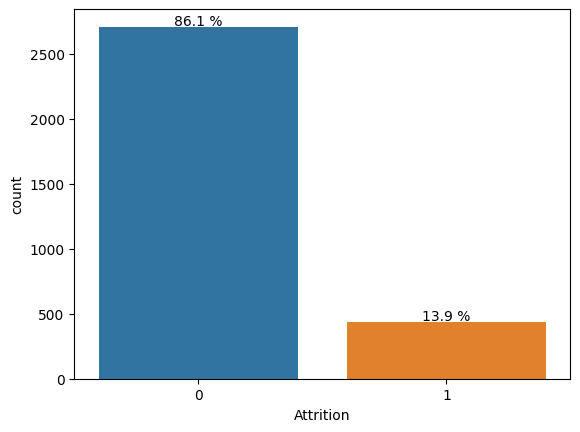

In [35]:
def draw_text_by_ax( ax, df ):
    percents = list()
    for patch in ax.patches:
        rate = patch.get_height() / df.shape[0] * 100
        ax.text(x=patch.get_x() + patch.get_width()/2,
                y=patch.get_y() + patch.get_height() + df.shape[0]*0.005,
                s=f'{rate:1.1f} %',
                ha='center')
        #print( patch )
        percents.append( rate )
    return ax, percents

draw_text_by_ax( sns.countplot( data=df, x='Attrition' ), df );

###성별, 야근, 나이

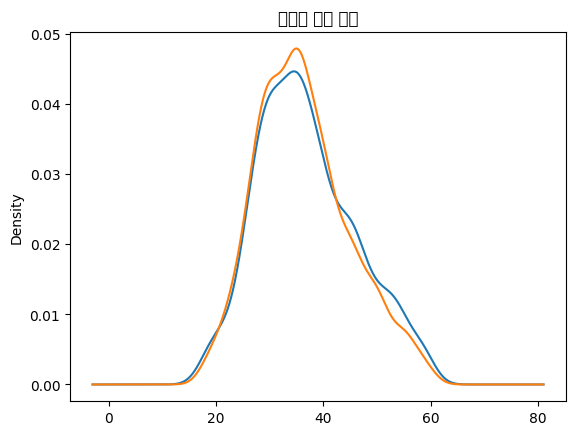

In [36]:
#성별, 나이 같이
df.groupby('Gender').Age.plot(kind='kde')
plt.title("성별과 나이 분포")
plt.show()

###초과근무
- 과반수 이상은 초과근무를 하지 않음

Text(0.5, 1.0, '초과근무 여부')

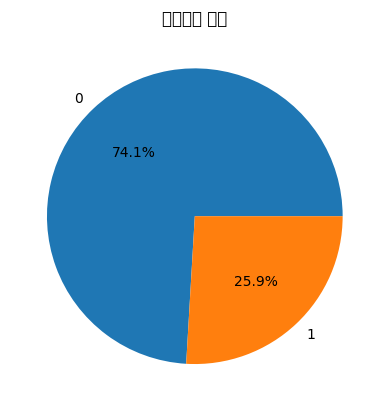

In [37]:
data = df.groupby('OverTime').size().plot(kind='pie', autopct ='%1.1f%%' )
plt.title("초과근무 여부")

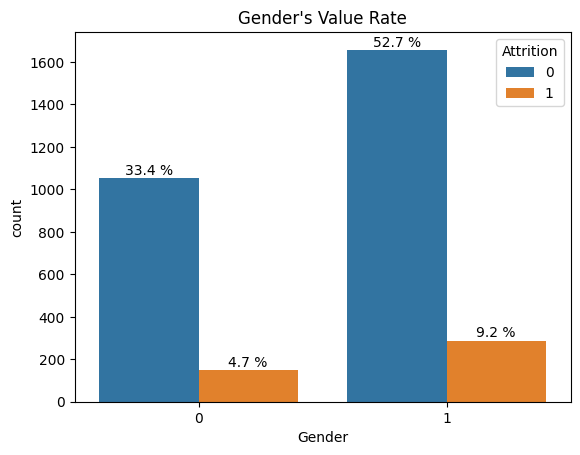

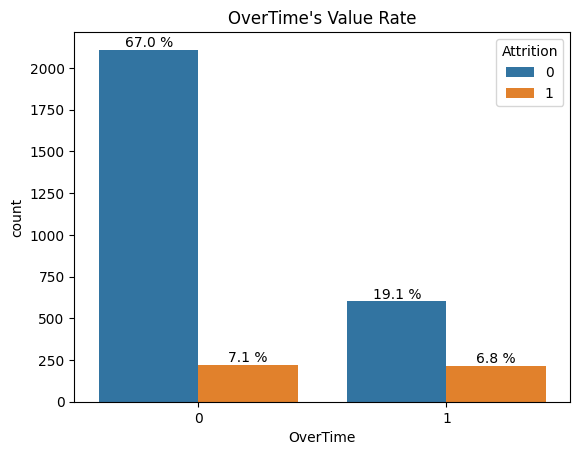

{'Gender': [33.428662217985384,
  52.68509691769939,
  4.734667937718462,
  9.151572926596758],
 'OverTime': [67.01620591039085,
  19.097553225293932,
  7.0543374642516685,
  6.831903400063552]}

In [38]:
bin_features = ['Gender', 'OverTime']
bin_logs     = dict()
for feat in bin_features:
    ax, percents = draw_text_by_ax( sns.countplot( data=df, x=feat, hue='Attrition'), df)
    bin_logs[feat] = percents
    ax.set_title(f'{feat}\'s Value Rate')
    plt.show()

bin_logs

###근무 부서
- R&D > Sales > HR 순으로 직원 많음

Text(0.5, 1.0, '근무 부서')

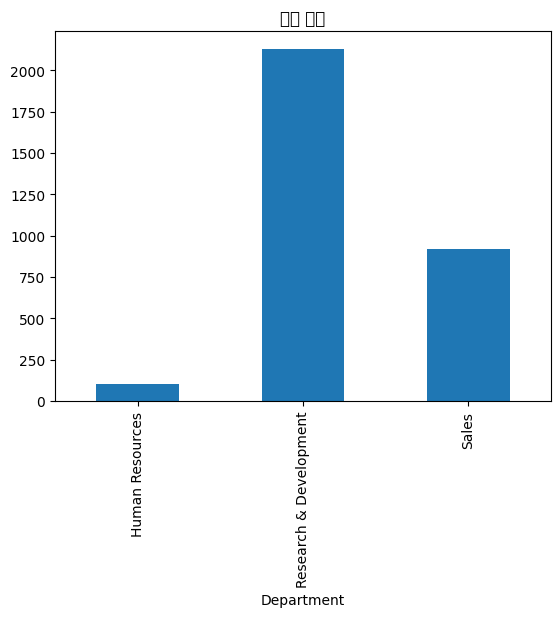

In [39]:
df.groupby('Department').size().plot(kind='bar')
plt.title ("근무 부서")

In [40]:
cross_tab=pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
cross_tab

Attrition,0,1
Department,,
Human Resources,81.372549,18.627451
Research & Development,87.828947,12.171053
Sales,82.660851,17.339149


Text(0.5, 1.0, '직급')

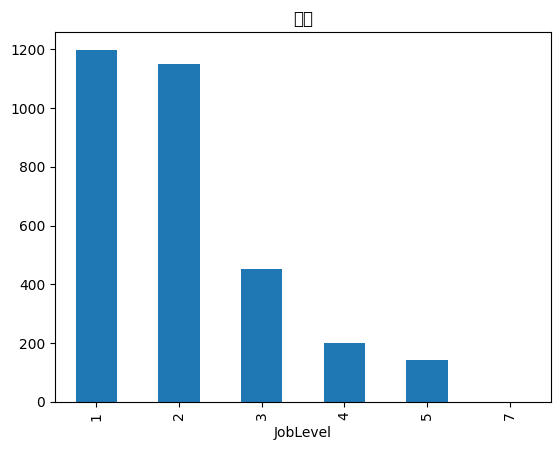

In [41]:
df.groupby('JobLevel').size().plot(kind='bar')
plt.title("직급")

Text(0.5, 1.0, '직업 만족도')

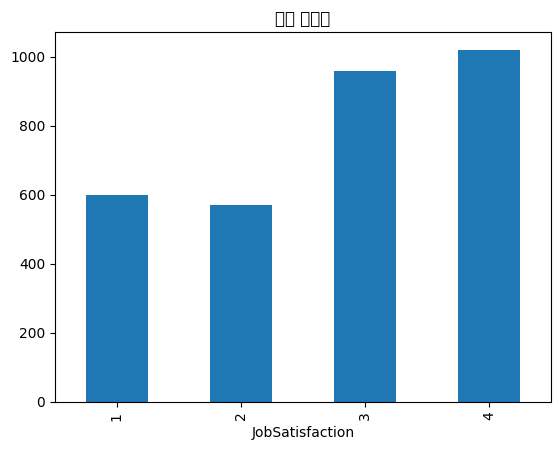

In [42]:
df.groupby('JobSatisfaction').size().plot(kind='bar')
plt.title("직업 만족도")

Text(0.5, 1.0, 'NumCompaniesWorked')

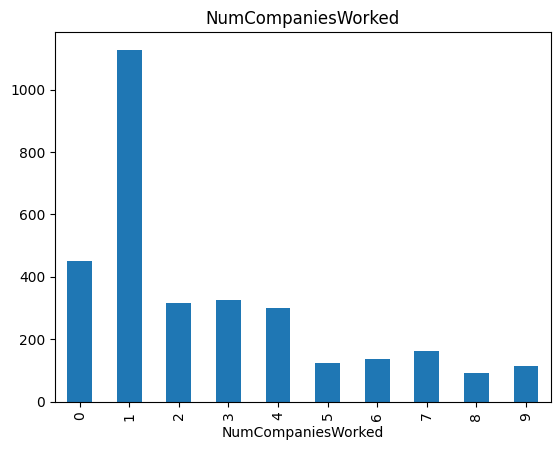

In [43]:
df.groupby('NumCompaniesWorked').size().plot(kind='bar')
plt.title ("NumCompaniesWorked")

In [44]:
cross_tab2=pd.crosstab(df['EducationField'], df['Attrition'], normalize='index') * 100
cross_tab2

Attrition,0,1
EducationField,,
Human Resources,75.000000,25.000000
Life Sciences,87.183201,12.816799
Marketing,80.385852,19.614148
Medical,87.561698,12.438302
Other,89.634146,10.365854
Technical Degree,80.672269,19.327731


In [45]:
cross_tab3=pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
cross_tab3

Attrition,0,1
JobRole,,
Healthcare Representative,93.356643,6.643357
Human Resources,77.906977,22.093023
Laboratory Technician,79.258010,20.741990
Manager,93.427230,6.572770
Manufacturing Director,95.601173,4.398827
Research Director,97.350993,2.649007
Research Scientist,86.006289,13.993711
Sales Executive,86.049927,13.950073
Sales Representative,63.125000,36.875000


Text(0.5, 1.0, '직무 분포')

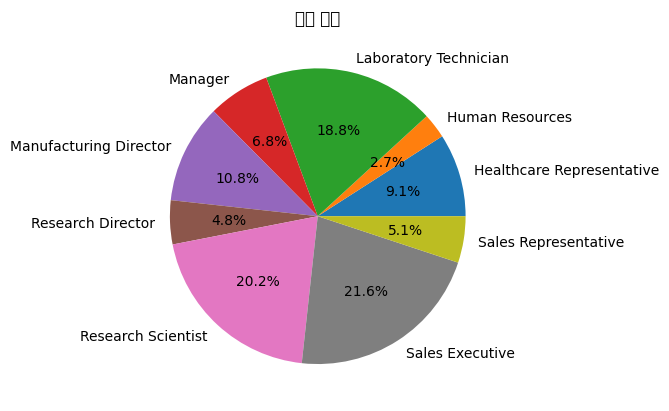

In [46]:
#직업 분포
data = df.groupby('JobRole').size().plot(kind='pie', autopct ='%1.1f%%' )
plt.title("직무 분포")

In [47]:
cross_tab4=pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100
cross_tab4

Attrition,0,1
MaritalStatus,,
Divorced,92.507645,7.492355
Married,89.349931,10.650069
Single,77.650430,22.349570


In [48]:
def make_cross_tabul( df, feature, t_nm):
    cross_tab = pd.crosstab(df[feature], df[t_nm], normalize='index') * 100
    cross_tab.reset_index(inplace = True)
    return cross_tab

cross_tab = make_cross_tabul(df, 'Department', 'Attrition')
cross_tab

Attrition,Department,0,1
0,Human Resources,81.372549,18.627451
1,Research & Development,87.828947,12.171053
2,Sales,82.660851,17.339149


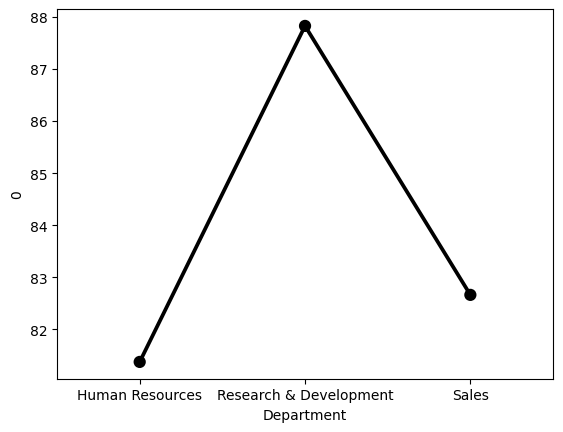

In [49]:
def show_pointplot( x_nm, y_nm, data, color='black', ax=None ):
    sns.pointplot( x=x_nm,       # 데이터에 피처값 -> 고유값
                   y=y_nm,       # 정답 0에 대한 컬럼명 -> 비중
                   data=data,    # 전체 데이터(교차분석표데이터)
                   order=data[x_nm], # x값이 배치되는 순서 Blue-Green-Red
                   color=color,  # 색상
                   ax=ax         # if ax else None
    );

show_pointplot('Department', 0, cross_tab )

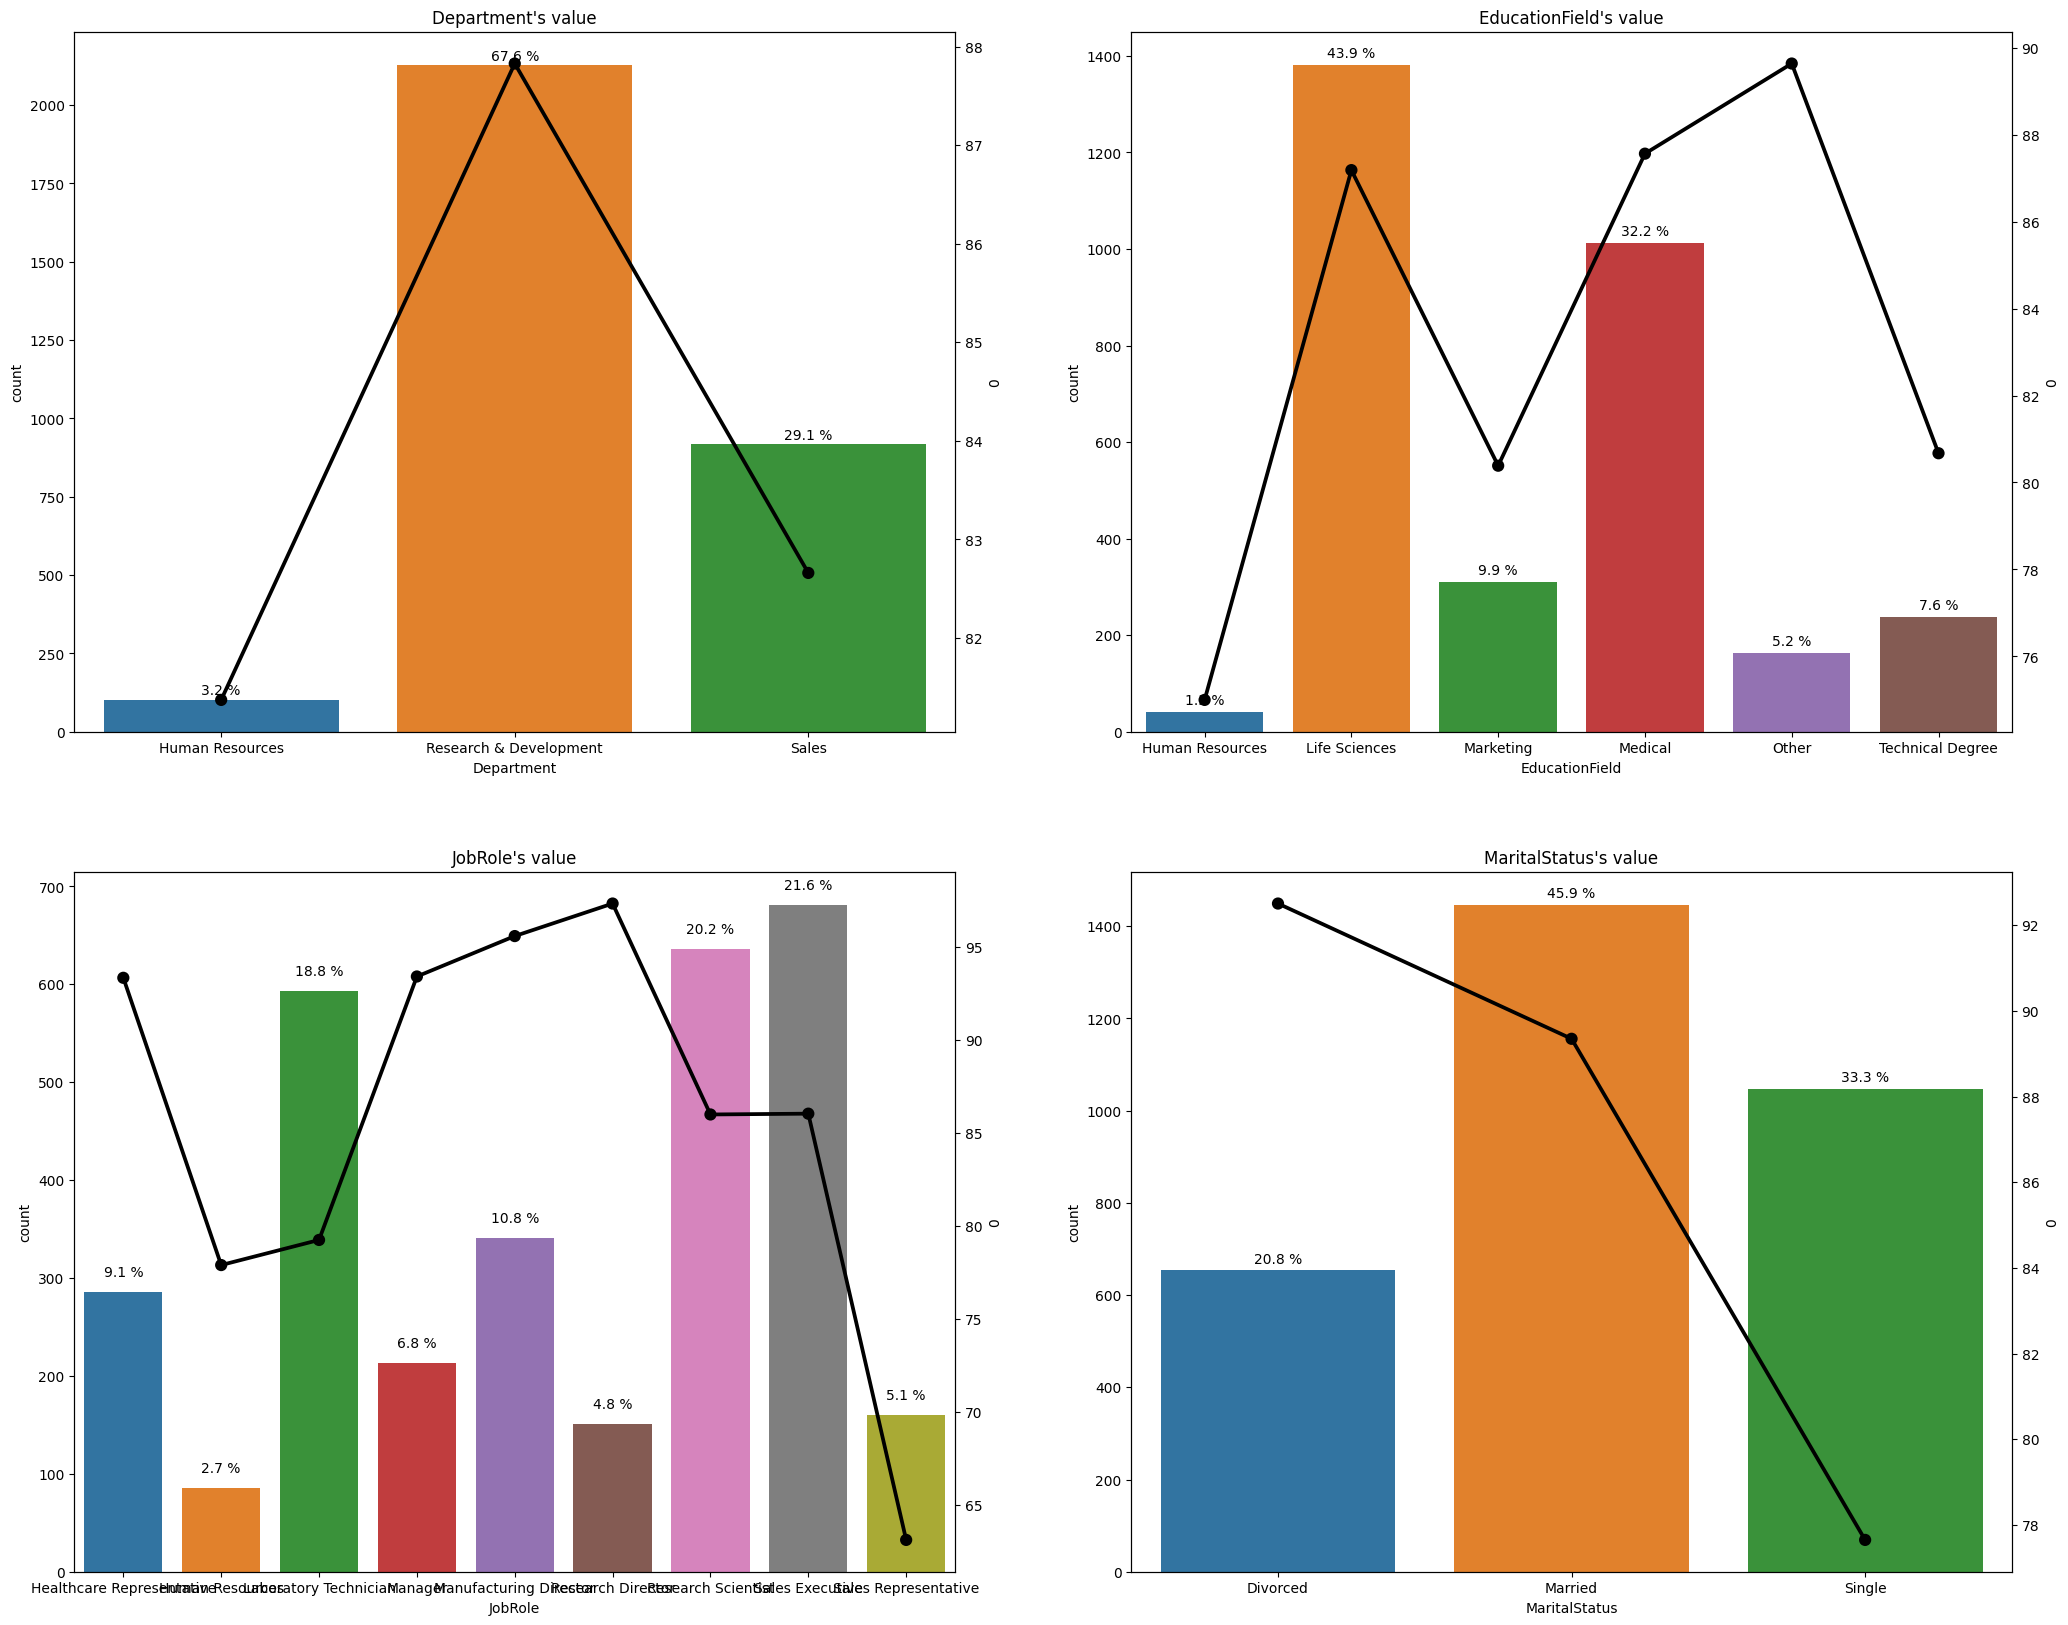

In [50]:
import matplotlib.gridspec as gs

nom_features = [ 'Department','EducationField', 'JobRole','MaritalStatus']
COLS         = 2
ROWS         = sum(divmod( len(nom_features),  COLS))

def show_count_point_plot( df, features, t_nm, rows, cols):
    plt.figure( figsize=(25, 20) )
    gs_grid = gs.GridSpec(rows, cols)

    for idx, feature in enumerate(features):

        ax = plt.subplot( gs_grid[idx] )
        cross_tab = make_cross_tabul(df, feature, t_nm )
        draw_text_by_ax( sns.countplot( data=df, x=feature, ax=ax, order=cross_tab[feature] ), df )
        show_pointplot( feature, 0, cross_tab, ax=ax.twinx() )

        ax.set_title(f'{feature}\'s value')
    plt.show()
    pass

show_count_point_plot( df, nom_features, 'Attrition', ROWS, COLS )


## 이상치 확인 - noise

In [51]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
\
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
\
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [52]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumGothicCoding',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumGothic']

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')
# 실제 경로
# /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings(action='ignore')


### 오류사항 체크

In [55]:
# 나이 < 근무 기간
age_error = df[df['Age'] < df['TotalWorkingYears']]
age_error

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2347,39,0,2,682,Research & Development,1,4,Other,4,1,...,3,4,1,41,0,3,41,8,12,10


In [56]:
# 나이별 가능한 실제 근무기간 ("태어나기 전부터 일함")
age_real_error = df[df['Age']-18 < df['TotalWorkingYears']]
age_real_error

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1479,25,0,2,806,Research & Development,9,1,Medical,3,0,...,3,3,1,9,2,2,9,7,7,8
1549,35,1,1,1396,Research & Development,11,1,Life Sciences,1,0,...,3,3,0,33,3,3,33,10,13,8
1573,23,0,1,857,Research & Development,1,1,Life Sciences,1,1,...,3,4,2,8,2,2,8,7,3,7
1580,33,1,2,1450,Sales,12,3,Life Sciences,1,0,...,4,1,0,16,2,1,0,0,0,0
1585,27,0,2,882,Research & Development,17,3,Medical,2,1,...,3,4,1,14,0,3,13,9,4,9
1608,38,0,2,1288,Research & Development,2,4,Medical,3,1,...,3,3,2,30,2,3,3,2,0,2
1642,20,1,2,1308,Research & Development,1,3,Medical,4,0,...,4,2,0,5,3,4,5,2,2,3
1738,31,1,2,523,Sales,3,5,Life Sciences,2,1,...,3,3,0,28,4,3,20,7,3,7
1781,19,0,2,741,Sales,29,3,Life Sciences,3,0,...,3,4,0,11,3,1,6,0,1,5
1800,30,0,2,1411,Human Resources,4,3,Human Resources,3,1,...,3,2,1,15,4,3,14,8,5,8


In [57]:
#총 일한 기간 < 해당 회사 일한 기간
working_yr_error = df[df["TotalWorkingYears"] < df["YearsAtCompany"]]
working_yr_error

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2256,39,0,2,1369,Human Resources,8,3,Medical,4,1,...,3,1,1,18,2,3,19,8,3,8
2970,53,0,2,1411,Research & Development,1,4,Life Sciences,3,0,...,3,4,1,29,2,2,30,9,11,13


In [58]:
#총 일한 기간 < 해당 직무 일한 기간
role_yr_error  = df[ df["TotalWorkingYears"] < df["YearsInCurrentRole"]]
role_yr_error

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2162,25,0,2,1117,Research & Development,1,2,Medical,4,1,...,3,4,0,6,2,2,6,7,1,5


### 학력사항 체크

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1997,38,0,2,548,Research & Development,1,15,Life Sciences,1,0,...,3,1,1,7,2,3,5,2,1,4


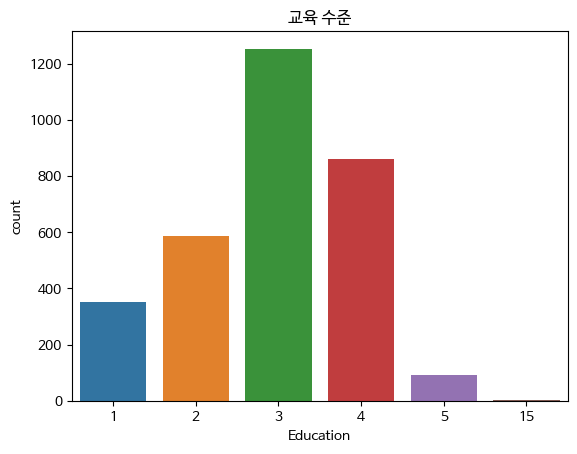

In [59]:
sns.countplot(data=df, x='Education')
plt.title('교육 수준')
df[df['Education'] == 15]

### 직업능력평가사항 체크

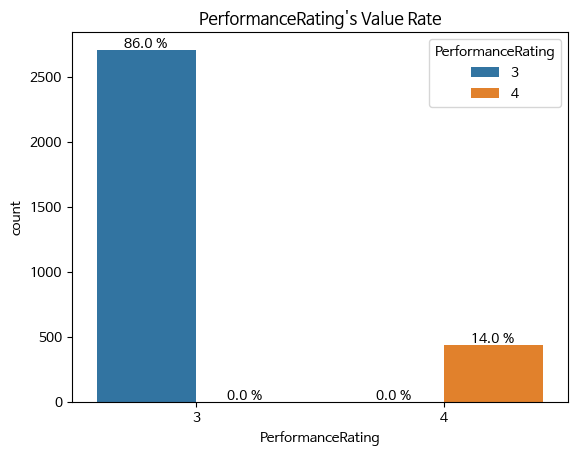

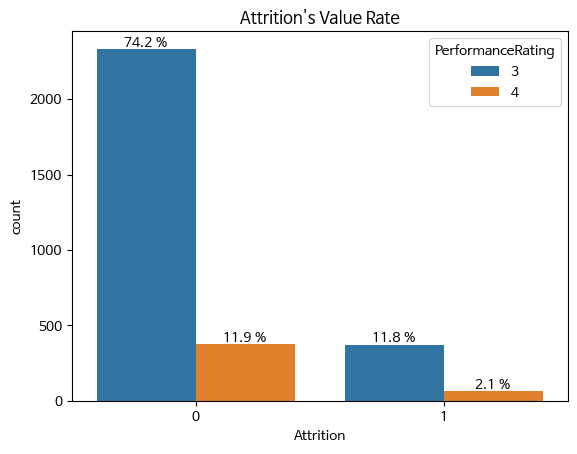

{'PerformanceRating': [86.01843025103273, 0.0, 0.0, 13.98156974896727],
 'Attrition': [74.19764855417858,
  11.820781696854146,
  11.916110581506196,
  2.065459167461074]}

In [60]:
PR_features = ['PerformanceRating', 'Attrition']
PR_logs     = dict()
for feat in PR_features:
    ax, percents = draw_text_by_ax( sns.countplot( data=df, x=feat, hue='PerformanceRating'), df)
    PR_logs[feat] = percents
    ax.set_title(f'{feat}\'s Value Rate')
    plt.show()

PR_logs

In [61]:
df_PR= df.pivot_table(index=['PerformanceRating'])
df_PR

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
3,36.478389,0.137421,1.664943,854.730329,8.81123,2.929073,2.759143,0.619505,66.854451,2.760251,...,13.958256,2.743628,0.746583,10.992612,2.768748,2.769856,6.908755,4.162542,2.068341,4.140007
4,36.284091,0.147727,1.584091,825.090909,9.60000,2.909091,2.629545,0.611364,67.234091,2.743182,...,21.740909,2.668182,0.809091,10.872727,2.734091,2.740909,6.852273,4.315909,2.125000,4.261364


In [62]:
def summary_feature_info( df_PR ):
    su_df = pd.DataFrame( df_PR.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = df_PR.isnull().sum().values
    su_df['고유값수'] = df_PR.nunique().values


    return su_df

summary_feat_df = summary_feature_info(df_PR )
summary_feat_df

,feature_name,type,결측치수,고유값수
0,Age,float64,0,2
1,Attrition,float64,0,2
2,BusinessTravel,float64,0,2
3,DailyRate,float64,0,2
4,DistanceFromHome,float64,0,2
5,Education,float64,0,2
6,EnvironmentSatisfaction,float64,0,2
7,Gender,float64,0,2
8,HourlyRate,float64,0,2
9,JobInvolvement,float64,0,2


### 직급별월급 체크

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3005,30,0,2,583,Research & Development,6,3,Life Sciences,4,0,...,3,4,0,12,1,2,8,7,1,5


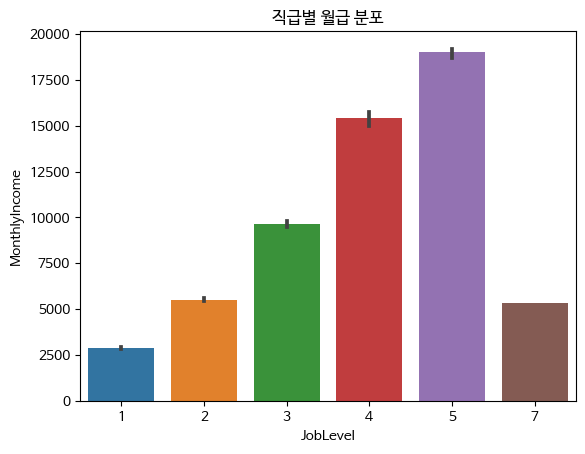

In [63]:
# 직급이 올라갈수록 월급도 상승함
# 하지만 직급 7의 경우는 예외 => 이상치 가능성 존재
sns.barplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title('직급별 월급 분포')

level7 = df[df.JobLevel == 7]
level7

## 중요 지표 별 퇴사 여부

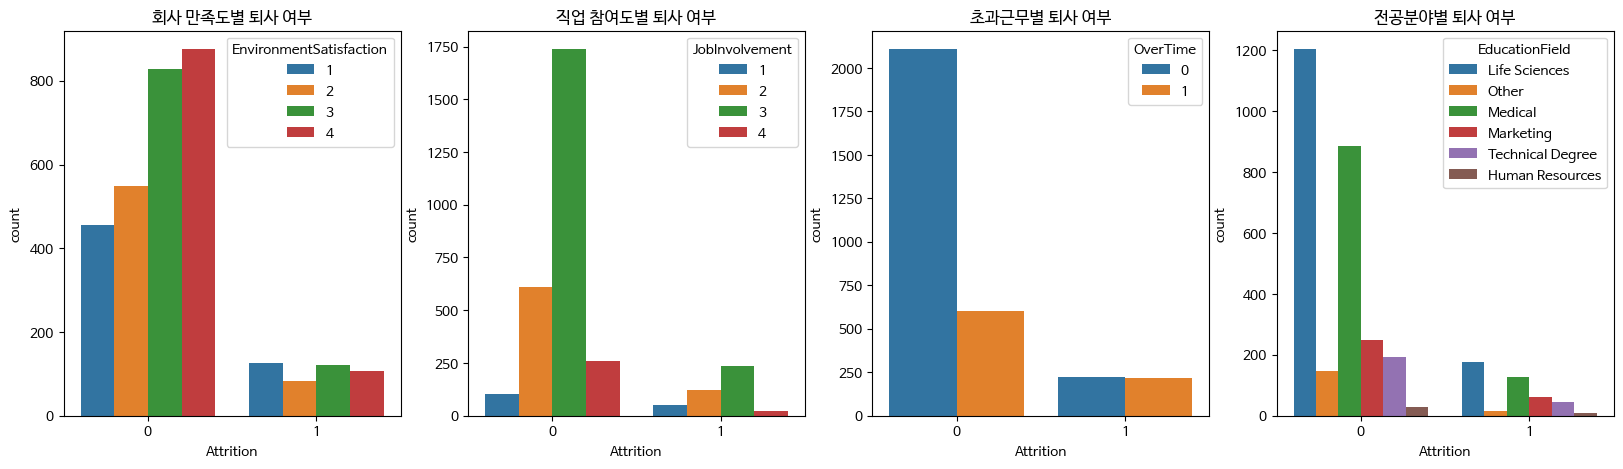

In [64]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(x='Attrition', hue = "EnvironmentSatisfaction", data= df, ax=ax[0])
ax[0].set_title("회사 만족도별 퇴사 여부")

sns.countplot(x='Attrition', hue = "JobInvolvement", data= df, ax=ax[1])
ax[1].set_title("직업 참여도별 퇴사 여부")

sns.countplot(x='Attrition', hue = "OverTime", data= df, ax=ax[2])
ax[2].set_title("초과근무별 퇴사 여부")

sns.countplot(x='Attrition', hue = "EducationField", data= df, ax=ax[3])
ax[3].set_title("전공분야별 퇴사 여부")

plt.show()

## 데이터 정규화

In [65]:
# 정규화 필요한 피처(고유값 3 이상) : DailyRate, DistanceFromHome,
# HourlyRate, MonthlyIncome, MonthlyRate,...
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy = df.copy()
df_col = list(df_copy.columns)
df_col.remove('Age')
df_col.remove('Gender')
df_col.remove('OverTime')
df_col.remove('PerformanceRating')
df_col.remove('Department')
df_col.remove('EducationField')
df_col.remove('JobRole')
df_col.remove('MaritalStatus')

for col in df_col:
    df_copy[col] = df_copy[col].astype(float)
    df_copy[[col]] = scaler.fit_transform(df_copy[[col]])

df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,1.0,0.261849,Sales,0.000000,0.071429,Life Sciences,0.333333,0,...,3,0.000000,0.000000,0.195122,0.0,0.000000,0.146341,0.222222,0.000000,0.294118
1,49,0.0,0.5,0.046347,Research & Development,0.250000,0.000000,Life Sciences,0.666667,1,...,4,1.000000,0.333333,0.243902,0.5,0.666667,0.243902,0.388889,0.066667,0.411765
2,37,1.0,1.0,0.332810,Research & Development,0.035714,0.071429,Other,1.000000,1,...,3,0.333333,0.000000,0.170732,0.5,0.666667,0.000000,0.000000,0.000000,0.000000
3,33,0.0,0.5,0.337785,Research & Development,0.071429,0.214286,Life Sciences,1.000000,0,...,3,0.666667,0.000000,0.195122,0.5,0.666667,0.195122,0.388889,0.200000,0.000000
4,27,0.0,1.0,0.128044,Research & Development,0.035714,0.000000,Medical,0.000000,1,...,3,1.000000,0.333333,0.146341,0.5,0.666667,0.048780,0.111111,0.133333,0.117647


## 데이터 정규화 후 중요 지표별 퇴사 여부

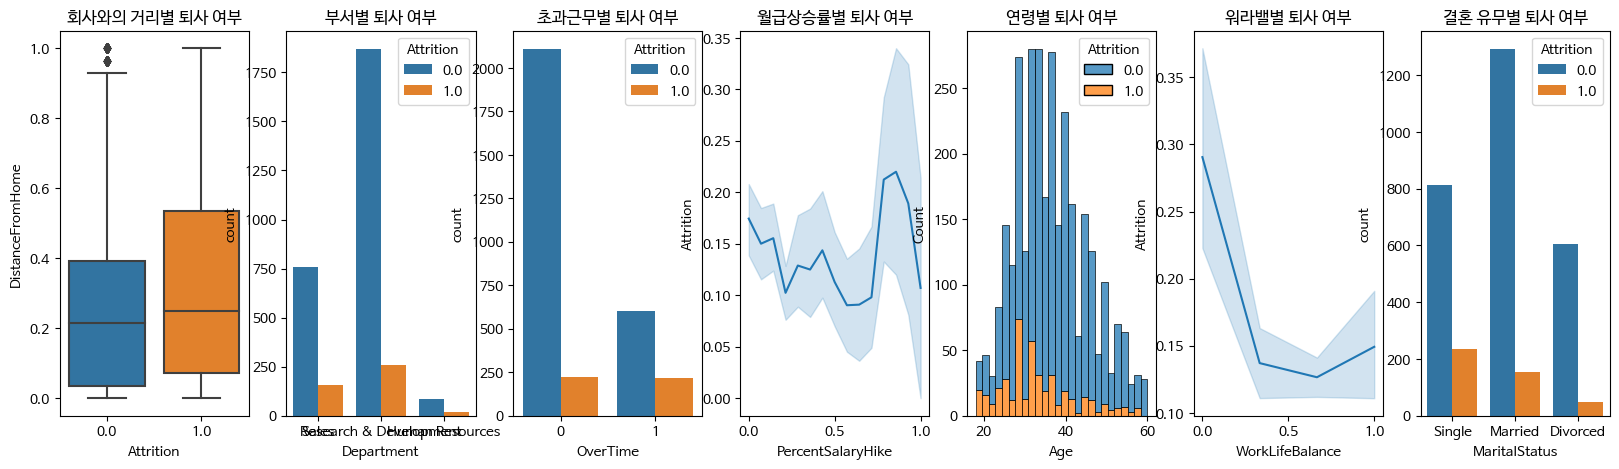

In [66]:
fig, ax = plt.subplots(1, 7, figsize=(20,5))

sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_copy, ax=ax[0])
ax[0].set_title("회사와의 거리별 퇴사 여부")

sns.countplot(x='Department', hue='Attrition', data=df_copy, ax=ax[1])
ax[1].set_title("부서별 퇴사 여부")

sns.countplot(x='OverTime', hue = "Attrition", data= df_copy, ax=ax[2])
ax[2].set_title("초과근무별 퇴사 여부")

sns.lineplot(x='PercentSalaryHike', y = "Attrition", data= df_copy, ax=ax[3])
ax[3].set_title("월급상승률별 퇴사 여부")

sns.histplot(data=df_copy, x='Age', hue='Attrition', multiple='stack', ax=ax[4])
ax[4].set_title("연령별 퇴사 여부")

sns.lineplot(x='WorkLifeBalance', y='Attrition', data=df_copy, ax=ax[5])
ax[5].set_title("워라밸별 퇴사 여부")

sns.countplot(x='MaritalStatus', hue = "Attrition", data=df_copy, ax=ax[6])
ax[6].set_title("결혼 유무별 퇴사 여부")

plt.show()

# 회사와의 거리가 멀수록 퇴사 많이함
# 부서가 차지하는 비중은 R & D, Sales, Human Recources 순으로 많고, 부서별 퇴사 비율도 비슷함 => 가장 많은 비중을 차지한 R & D 부서가 가장 퇴사 많이함
# 초과근무 여부에 상관없이 퇴사한 인원은 동일. 그 대신 비율의 차이가 있음 => 초과근무 한 사람의 퇴사 비율이 안 한 사람보다 더 큼
# 월급상승률 중반 이후에 퇴사 비율이 상승하지만, 후반에 다시 퇴사 비율 감소
# 20대 후반 ~ 30대 초반이 퇴사를 많이함
# 워라밸이 보장될수록 퇴사 비율이 낮아짐